This file containst the code for preparing, exploring MEG-data from the [Human connectome dataset](https://www.humanconnectome.org/storage/app/media/documentation/s1200/HCP_S1200_Release_Reference_Manual.pdf), and training and evaluating different models on a subset of the data provided in the context of "Pattern Recognition and Deep Learning" taught by Siamak Mehrkanoon. Check out their [Repository](https://github.com/SMehrkanoon/Deep-brain-state-classification-of-MEG-data) for a state of the art model and the underlying data.

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import h5py
import os
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [2]:
#Inspecting a sample
def plotframe(array, title=""):
    df_cm = pd.DataFrame(array, range(len(array)), range(len(array[0])))
    # plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, cmap="PuRd", annot_kws={"size": 16}) # font size
    plt.title(title)
    plt.show()

def get_dataset_name(file_path):
    file_name = file_path.split('/')[-1]
    temp = file_name.split('_')[:-1]
    dataset_name = "_".join(temp)
    return dataset_name

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1), copy=True, clip=False)

def loadFile(file_path):
    with h5py.File(file_path, 'r') as f:
        dataset_name = get_dataset_name(file_path)
        matrix = f.get(dataset_name)[()]
        scaled_data = scaler.fit_transform(matrix)
        # Print information about the scaled data
        print(f"File: {file_path}")
        print(f"Scaled data type: {type(scaled_data)}")
        print(f"Scaled data shape: {scaled_data.shape}")
        return scaled_data



In [4]:
#Original Implementation here: https://github.com/SMehrkanoon/Deep-brain-state-classification-of-MEG-data/blob/c2f848bbf83ce76b4820ec56028b3571b09b7111/AA-CascadeNet_AA-MultiviewNet/data_utils.py#L732
def array_to_mesh(arr):    

    input_rows = 20
    input_columns = 21
    input_channels = 248
    print(arr.shape)
    assert arr.shape == (1,input_channels),"the shape of the input array should be (1,248) because there are 248 MEG channels,received array of shape " + str(arr.shape)
    output = np.zeros((input_rows,input_columns),dtype = float)
    
    #121
    output[0][10] = arr[0][120]
      
    #89
    output[1][12] = arr[0][151]
    output[1][11] = arr[0][119]
    output[1][10] = arr[0][88]
    output[1][9] = arr[0][89]
    output[1][8] = arr[0][121]
    
    #61
    output[2][13] = arr[0][150]
    output[2][12] = arr[0][118]
    output[2][11] = arr[0][87]
    output[2][10] = arr[0][60]
    output[2][9] = arr[0][61]
    output[2][8] = arr[0][90]
    output[2][7] = arr[0][122]
    
    #37
    output[3][14] = arr[0][149]
    output[3][13] = arr[0][117]
    output[3][12] = arr[0][86]
    output[3][11] = arr[0][59]
    output[3][10] = arr[0][36]
    output[3][9] = arr[0][37]
    output[3][8] = arr[0][62]
    output[3][7] = arr[0][91]
    output[3][6] = arr[0][123]
    
    #19
    output[4][17] = arr[0][194]
    output[4][16] = arr[0][175]
    output[4][15] = arr[0][148]
    output[4][14] = arr[0][116]
    output[4][13] = arr[0][85]
    output[4][12] = arr[0][58]
    output[4][11] = arr[0][35]
    output[4][10] = arr[0][18]
    output[4][9] = arr[0][19]
    output[4][8] = arr[0][38]
    output[4][7] = arr[0][63]
    output[4][6] = arr[0][92]
    output[4][5] = arr[0][152]
    output[4][4] = arr[0][176]

    #5
    output[5][20] = arr[0][247]
    output[5][19] = arr[0][227]
    output[5][18] = arr[0][193]
    output[5][17] = arr[0][174]
    output[5][16] = arr[0][147]
    output[5][15] = arr[0][115]
    output[5][14] = arr[0][84]
    output[5][13] = arr[0][57]
    output[5][12] = arr[0][34]
    output[5][11] = arr[0][17]
    output[5][10] = arr[0][4]
    output[5][9] = arr[0][5]
    output[5][8] = arr[0][20]
    output[5][7] = arr[0][39]
    output[5][6] = arr[0][64]
    output[5][5] = arr[0][93]
    output[5][4] = arr[0][125]
    output[5][3] = arr[0][153]
    output[5][2] = arr[0][177]
    output[5][1] = arr[0][211]
    output[5][0] = arr[0][228]
    
    #4
    output[6][20] = arr[0][246]
    output[6][19] = arr[0][226]
    output[6][18] = arr[0][192]
    output[6][17] = arr[0][173]
    output[6][16] = arr[0][146]
    output[6][15] = arr[0][114]
    output[6][14] = arr[0][83]
    output[6][13] = arr[0][56]
    output[6][12] = arr[0][33]
    output[6][11] = arr[0][16]
    output[6][10] = arr[0][3]
    output[6][9] = arr[0][6]
    output[6][8] = arr[0][21]
    output[6][7] = arr[0][40]
    output[6][6] = arr[0][65]
    output[6][5] = arr[0][94]
    output[6][4] = arr[0][126]
    output[6][3] = arr[0][154]
    output[6][2] = arr[0][178]
    output[6][1] = arr[0][212]
    output[6][0] = arr[0][229]

    
    #3
    output[7][19] = arr[0][245]
    output[7][18] = arr[0][210]
    output[7][17] = arr[0][172]
    output[7][16] = arr[0][145]
    output[7][15] = arr[0][113]
    output[7][14] = arr[0][82]
    output[7][13] = arr[0][55]
    output[7][12] = arr[0][32]
    output[7][11] = arr[0][15]
    output[7][10] = arr[0][2]
    output[7][9] = arr[0][7]
    output[7][8] = arr[0][22]
    output[7][7] = arr[0][41]
    output[7][6] = arr[0][66]
    output[7][5] = arr[0][95]
    output[7][4] = arr[0][127]
    output[7][3] = arr[0][155]
    output[7][2] = arr[0][195]
    output[7][1] = arr[0][230]
            
    #8
    output[8][19] = arr[0][244]
    output[8][18] = arr[0][209]
    output[8][17] = arr[0][171]
    output[8][16] = arr[0][144]
    output[8][15] = arr[0][112]
    output[8][14] = arr[0][81]
    output[8][13] = arr[0][54]
    output[8][12] = arr[0][31]
    output[8][11] = arr[0][14]
    output[8][10] = arr[0][1]
    output[8][9] = arr[0][8]
    output[8][8] = arr[0][23]
    output[8][7] = arr[0][42]
    output[8][6] = arr[0][67]
    output[8][5] = arr[0][96]
    output[8][4] = arr[0][128]
    output[8][3] = arr[0][156]
    output[8][2] = arr[0][196]
    output[8][1] = arr[0][231]
    
    #1
    output[9][19] = arr[0][243]
    output[9][18] = arr[0][208]
    output[9][17] = arr[0][170]
    output[9][16] = arr[0][143]
    output[9][15] = arr[0][111]
    output[9][14] = arr[0][80]
    output[9][13] = arr[0][53]
    output[9][12] = arr[0][30]
    output[9][11] = arr[0][13]
    output[9][10] = arr[0][0]
    output[9][9] = arr[0][9]
    output[9][8] = arr[0][24]
    output[9][7] = arr[0][43]
    output[9][6] = arr[0][68]
    output[9][5] = arr[0][97]
    output[9][4] = arr[0][129]
    output[9][3] = arr[0][157]
    output[9][2] = arr[0][197]
    output[9][1] = arr[0][232]
    
    #12
    output[10][18] = arr[0][225]
    output[10][17] = arr[0][191]
    output[10][16] = arr[0][142]
    output[10][15] = arr[0][110]
    output[10][14] = arr[0][79]
    output[10][13] = arr[0][52]
    output[10][12] = arr[0][29]
    output[10][11] = arr[0][12]
    output[10][10] = arr[0][11]
    output[10][9] = arr[0][10]
    output[10][8] = arr[0][25]
    output[10][7] = arr[0][44]
    output[10][6] = arr[0][69]
    output[10][5] = arr[0][98]
    output[10][4] = arr[0][130]
    output[10][3] = arr[0][179]
    output[10][2] = arr[0][213]
    
    #28
    output[11][16] = arr[0][169]
    output[11][15] = arr[0][141]
    output[11][14] = arr[0][109]
    output[11][13] = arr[0][78]
    output[11][12] = arr[0][51]
    output[11][11] = arr[0][28]
    output[11][10] = arr[0][27]
    output[11][9] = arr[0][26]
    output[11][8] = arr[0][45]
    output[11][7] = arr[0][70]
    output[11][6] = arr[0][99]
    output[11][5] = arr[0][131]
    output[11][4] = arr[0][158]
    
    #49
    output[12][17] = arr[0][190]
    output[12][16] = arr[0][168]
    output[12][15] = arr[0][140]
    output[12][14] = arr[0][108]
    output[12][13] = arr[0][77]
    output[12][12] = arr[0][50]
    output[12][11] = arr[0][49]
    output[12][10] = arr[0][48]
    output[12][9] = arr[0][47]
    output[12][8] = arr[0][46]
    output[12][7] = arr[0][71]
    output[12][6] = arr[0][100]
    output[12][5] = arr[0][132]
    output[12][4] = arr[0][159]
    output[12][3] = arr[0][180]

    
    #75
    output[13][18] = arr[0][224]
    output[13][17] = arr[0][207]
    output[13][16] = arr[0][189]
    output[13][15] = arr[0][167]
    output[13][14] = arr[0][139]
    output[13][13] = arr[0][107]
    output[13][12] = arr[0][76]
    output[13][11] = arr[0][75]
    output[13][10] = arr[0][74]
    output[13][9] = arr[0][73]
    output[13][8] = arr[0][72]
    output[13][7] = arr[0][101]
    output[13][6] = arr[0][133]
    output[13][5] = arr[0][160]
    output[13][4] = arr[0][181]
    output[13][3] = arr[0][198]
    output[13][2] = arr[0][214]
    
    #105
    output[14][18] = arr[0][242]
    output[14][17] = arr[0][223]
    output[14][16] = arr[0][206]
    output[14][15] = arr[0][188]
    output[14][14] = arr[0][166]
    output[14][13] = arr[0][138]
    output[14][12] = arr[0][106]
    output[14][11] = arr[0][105]
    output[14][10] = arr[0][104]
    output[14][9] = arr[0][103]
    output[14][8] = arr[0][102]
    output[14][7] = arr[0][134]
    output[14][6] = arr[0][161]
    output[14][5] = arr[0][182]
    output[14][4] = arr[0][199]
    output[14][3] = arr[0][215]
    output[14][2] = arr[0][233]
    
    
    #137
    output[15][16] = arr[0][241]
    output[15][15] = arr[0][222]
    output[15][14] = arr[0][205]
    output[15][13] = arr[0][187]
    output[15][12] = arr[0][165]
    output[15][11] = arr[0][137]
    output[15][10] = arr[0][136]
    output[15][9] = arr[0][135]
    output[15][8] = arr[0][162]
    output[15][7] = arr[0][183]
    output[15][6] = arr[0][200]
    output[15][5] = arr[0][216]
    output[15][4] = arr[0][234]
    
    
    #mix
    output[16][15] = arr[0][240]
    output[16][14] = arr[0][221]
    output[16][13] = arr[0][204]
    output[16][12] = arr[0][186]
    output[16][11] = arr[0][164]
    output[16][10] = arr[0][163]
    output[16][9] = arr[0][184]
    output[16][8] = arr[0][201]
    output[16][7] = arr[0][217]
    output[16][6] = arr[0][235]
   
    #186
    output[17][12] = arr[0][220]
    output[17][11] = arr[0][203]
    output[17][10] = arr[0][185]
    output[17][9] = arr[0][202]
    output[17][8] = arr[0][218]
   
    #220
    output[18][11] = arr[0][239]
    output[18][10] = arr[0][219]
    output[18][9] = arr[0][236]
    
    #mix
    output[19][11] = arr[0][238]
    output[19][10] = arr[0][237]
    
    return output


File: ../Final Project data/Intra/train/rest_105923_1.h5
Scaled data type: <class 'numpy.ndarray'>
Scaled data shape: (248, 35624)
(1, 248)


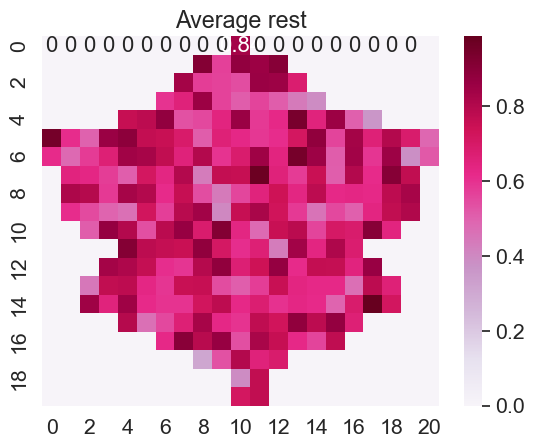

File: ../Final Project data/Intra/train/task_motor_105923_1.h5
Scaled data type: <class 'numpy.ndarray'>
Scaled data shape: (248, 35624)
(1, 248)


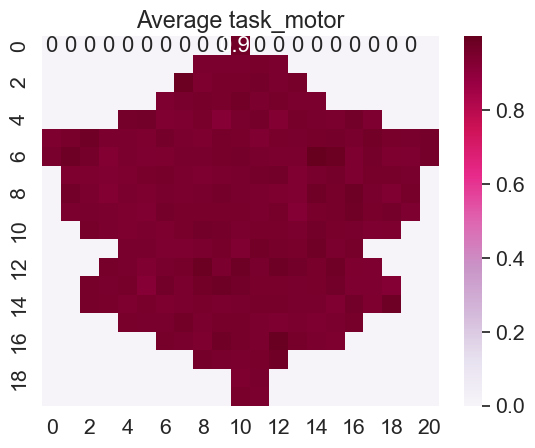

File: ../Final Project data/Intra/train/task_story_math_105923_1.h5
Scaled data type: <class 'numpy.ndarray'>
Scaled data shape: (248, 35624)
(1, 248)


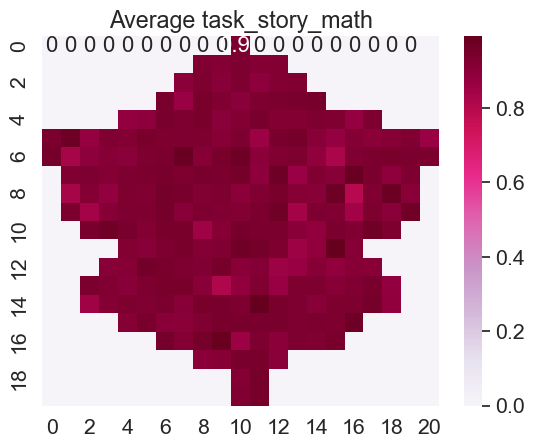

File: ../Final Project data/Intra/train/task_working_memory_105923_1.h5
Scaled data type: <class 'numpy.ndarray'>
Scaled data shape: (248, 35624)
(1, 248)


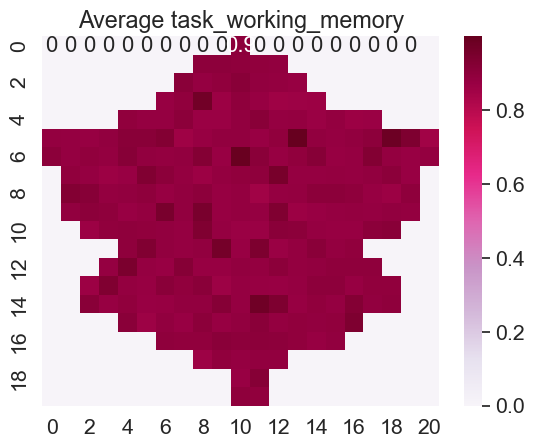

In [5]:
# Loop over task types
base_directory = "../Final Project data/Intra/train/"
task_types = ['rest', 'task_motor', 'task_story_math', 'task_working_memory']
for task_type in task_types:  # Add more task types as needed
    for number in ['1']:#, '2', '3', '4', '5', '6', '7', '8']:  # Add more numbers as needed
        # Construct the file path
        file_path = os.path.join(base_directory, f"{task_type}_105923_{number}.h5")
        matrix = loadFile(file_path)
        idMatrix =np.average(matrix, axis=1)
        frame2 = np.reshape(idMatrix,(1,248))
        meshDisplay = array_to_mesh(frame2)
        plotframe(meshDisplay, title=f"Average {task_type}")


